# LIBRARY

In [1]:
# Data Preprocessing
import numpy as np
import pandas as pd
import json

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

# Data Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost
import lightgbm

# Text Sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Others
import os
from datetime import datetime
import math
import requests
import re
from pathlib import Path
import pycountry

# Excel
import openpyxl
from openpyxl import load_workbook, Workbook
from openpyxl.chart import LineChart, BarChart, Reference, Series
from openpyxl.chart.axis import DateAxis

# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
report_name = "report.xlsx"

In [3]:
# ref: https://stackoverflow.com/questions/63404342/how-to-move-a-copied-worksheet-to-the-first-position
def create_position_sheet(wb, sheet_name, position):
    try:
        if wb[sheet_name]:
            wb.remove(wb[sheet_name])
    except:
        pass
    wb.create_sheet(sheet_name, position)
    
    return wb

In [6]:
def create_dashboard_analysis():
    # Check if a report file exist
    excel_file = Path(report_name)
    if excel_file.is_file() == False:
        writer = pd.ExcelWriter(report_name, engine='xlsxwriter')
        writer.save()

    # Open Excel file
    book = load_workbook(report_name)
    
    sheet_name = "FB Dashboard"
    position = 0
    book = create_position_sheet(book, sheet_name, position)

    sheet_name = "FB Post Analysis"
    position = 1
    book = create_position_sheet(book, sheet_name, position)

    sheet_name = "IG Dashboard"
    position = 2
    book = create_position_sheet(book, sheet_name, position)

    sheet_name = "IG Post Analysis"
    position = 3
    book = create_position_sheet(book, sheet_name, position)

    writer = pd.ExcelWriter(report_name, engine='openpyxl') 
    writer.book = book

    # Store all existing sheets
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

    writer.save()
    writer.close()

In [5]:
create_dashboard_analysis()

# 1. FB

In [38]:
save_path = 'fb image'

## 1.1 Page Dashboard

In [7]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb page performance')

### Page like, Page View, Page Post Engagement, Page Video View, Page People Reached

In [8]:
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

##### FB PAGE PERFORMANCE
sheet_name = 'fb page performance'
data_frame = pd.read_excel(open(report_name, 'rb'), sheet_name=sheet_name)
max_rows = data_frame.shape[0] + 1
min_col_row = 2

ws = writer.sheets[sheet_name]
ws_dashboard = writer.sheets['FB Dashboard']

### fb page fan
chart = LineChart()
chart.title = "page fan"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)

#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "A2")



### fb page views
chart = LineChart()
chart.title = "page views"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 3
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)

#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "K2")



### fb page engagements
chart = LineChart()
chart.title = "page engagements"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 4
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)

#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "U2")


### fb page video views
chart = LineChart()
chart.title = "page video views"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 5
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)

#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "A19")



### fb page people reached
chart = LineChart()
chart.title = "page people reached"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 6
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)

#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "K19")

writer.save()
writer.close()

### Gender

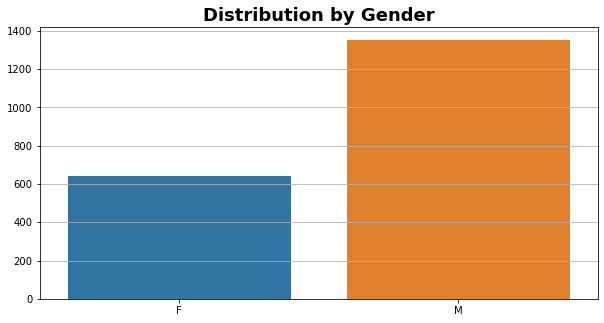

In [39]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb gender age')

ig_gender = df.groupby(['gender'])['value'].sum()

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(ig_gender.index, ig_gender.values)
sns_plot.set_title('Distribution by Gender', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/fb gender.jpeg".format(save_path), bbox_inches='tight')

### Age

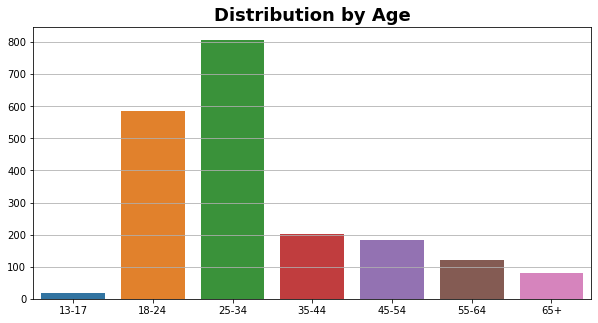

In [40]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb gender age')

ig_gender = df.groupby(['group age'])['value'].sum()

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(ig_gender.index, ig_gender.values)
sns_plot.set_title('Distribution by Age', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/fb age.jpeg".format(save_path), bbox_inches='tight')

### Gender By Age

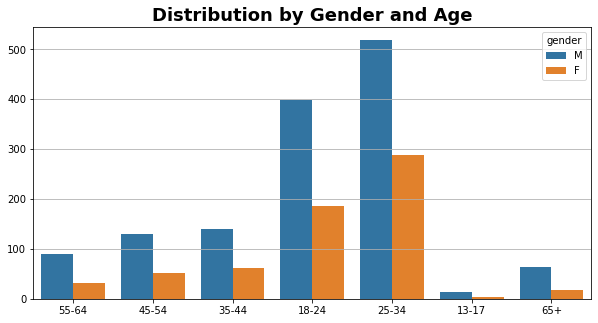

In [41]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb gender age')

# ig_gender = df.groupby(['gender', 'group age'])['value'].sum()

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x="group age", y="value", hue="gender", data=df)
sns_plot.set_title('Distribution by Gender and Age', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/fb gender age.jpeg".format(save_path), bbox_inches='tight')

### City

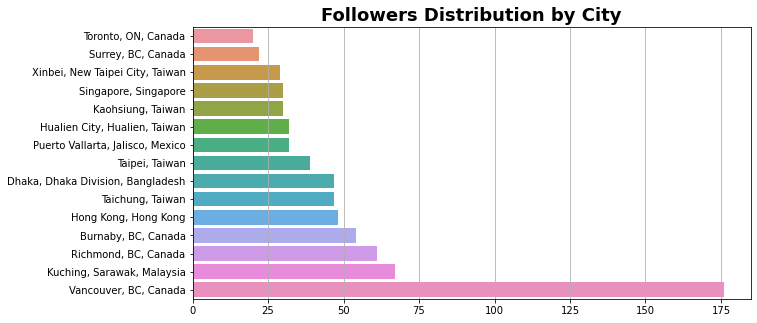

In [42]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb city')
city = df.sort_values(by=['value'])[-15:]

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x='value', y='city', data=city, orient = 'h')

sns_plot.set_title('Followers Distribution by City', weight='bold').set_fontsize('18')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='x') 

sns_plot.figure.savefig("./{}/fb city.jpeg".format(save_path), bbox_inches='tight')

### Country

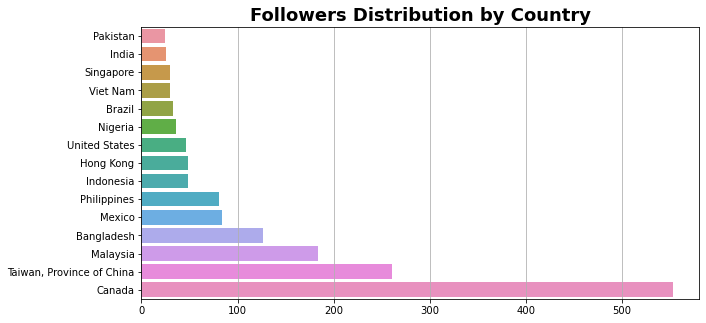

In [43]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb country')

country = df.sort_values(by=['value'])[-15:]

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x='value', y='country', data=country, orient = 'h')

sns_plot.set_title('Followers Distribution by Country', weight='bold').set_fontsize('18')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='x') 

sns_plot.figure.savefig("./{}/fb country.jpeg".format(save_path), bbox_inches='tight')

### Save File

In [44]:
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)


ws_dashboard = writer.sheets['FB Dashboard']

### FB gender
img = openpyxl.drawing.image.Image('./{}/fb gender.jpeg'.format(save_path))
img.anchor = 'A36'
ws_dashboard.add_image(img)

### FB age
img = openpyxl.drawing.image.Image('./{}/fb age.jpeg'.format(save_path))
img.anchor = 'K36'
ws_dashboard.add_image(img)

### FB gender age
img = openpyxl.drawing.image.Image('./{}/fb gender age.jpeg'.format(save_path))
img.anchor = 'U36'
ws_dashboard.add_image(img)

### FB city
img = openpyxl.drawing.image.Image('./{}/fb city.jpeg'.format(save_path))
img.anchor = 'A55'
ws_dashboard.add_image(img)

### FB country
img = openpyxl.drawing.image.Image('./{}/fb country.jpeg'.format(save_path))
img.anchor = 'N55'
ws_dashboard.add_image(img)

writer.save()
writer.close()

##  1.2 Post

In [45]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='fb posts')

###  1.2.1 Paid Post & Organic Post

In [46]:
paid_post_url = ['https://www.facebook.com/680953308635161/posts/3810538239009970/', 'https://www.facebook.com/680953308635161/posts/3645057162224746/',
                 'https://www.facebook.com/680953308635161/posts/3580115332052263/', 'https://www.facebook.com/680953308635161/posts/3601160646614398/',
                 'https://www.facebook.com/680953308635161/posts/3683396118390850/', 'https://www.facebook.com/680953308635161/posts/3951092848287841/',
                 'https://www.facebook.com/680953308635161/posts/3970444619685997/', 'https://www.facebook.com/680953308635161/posts/3686308651432930/',
                 'https://www.facebook.com/680953308635161/posts/3550862848310845/', 'https://www.facebook.com/680953308635161/posts/3643682665695529/',
                 'https://www.facebook.com/680953308635161/posts/4190909057639551/']
fb_paid_posts = df[df['url'] .isin(paid_post_url)]

In [47]:
fb_organic_posts = df[df['url'] .isin(paid_post_url) == False]

#### Photo Posts

In [48]:
fb_organic_photo = fb_organic_posts[fb_organic_posts['status_type']=='photos']

#### Outlier Removal

In [49]:
fb_organic_photo = fb_organic_photo[fb_organic_photo['total_impression'] < 2000]

In [50]:
df = fb_organic_photo.copy()

#### Feature Extraction

In [51]:
# Change datatype of date
df['date'] = pd.to_datetime(df['date'])

# Create new features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofweek'] = df['dayofweek'].map( {0: '1_Mon', 1: '2_Tue', 2: '3_Wed', 3: '4_Thur', 4: '5_Fri', 5: '6_Sat', 6: '7_Sun'})
df['date'] = df['date'].dt.date   # df['date'].dt.normalize()  # Show only date

### 1.2.2 Impression Performance

In [52]:
def plot_4_graphs(data_frame, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path):
    table = data_frame.groupby(dimension)[metric].agg(metric_aggregation)
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(whole_chart_title, fontsize=22, weight='bold')
    # fig.tight_layout() # plt.tight_layout()
    axes = axes.flatten()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    
    for i in range (4):
        metric_aggregation_name = metric_aggregation[i]
        chart_title = chart_titles[i]
        
        plot = sns.barplot(x=table.index, y=table[metric_aggregation_name], ax=axes[i]) ###
        plot.axes.set_title(chart_title,fontsize=18)
        plot.set_xlabel(dimension,fontsize=15)
        plot.set_ylabel(metric_aggregation_name,fontsize=15)
    
    plt.show()
    
    fig.savefig('./{}/{}.jpeg'.format(save_path, image_description), bbox_inches='tight', dpi=50)
    return data_frame.groupby(dimension)[[metric]].agg(metric_aggregation)

### Impression Performance over a 24h day

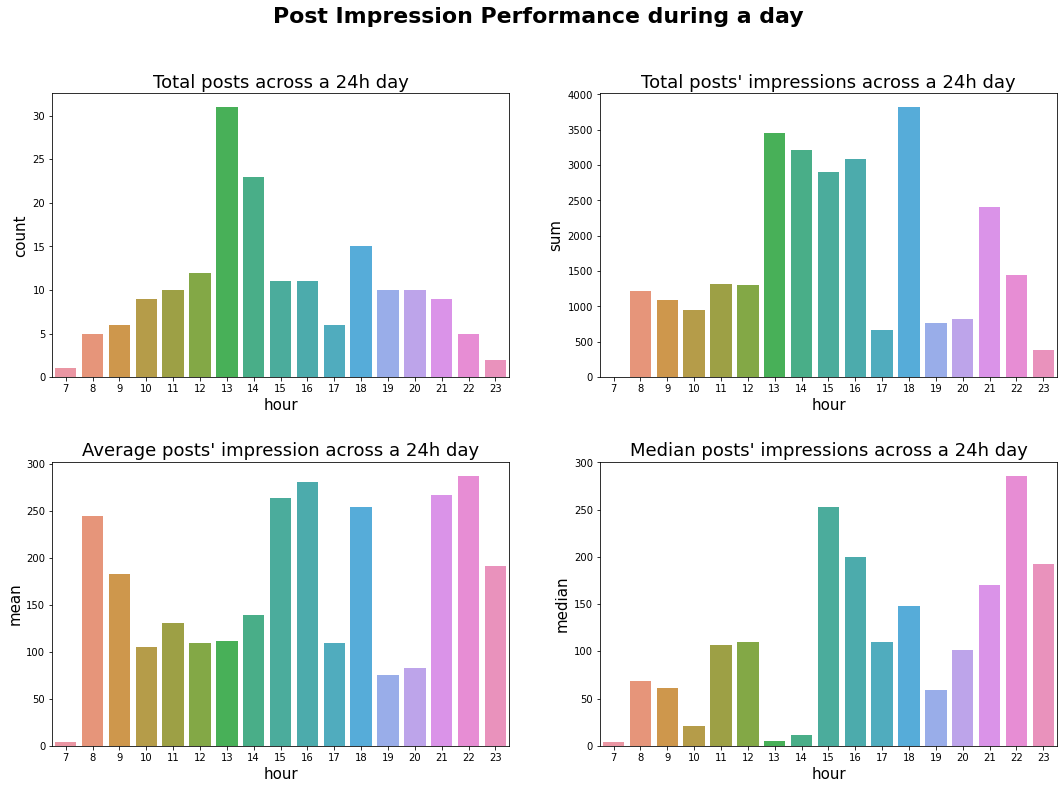

total_impression                         
                count   sum        mean median
hour                                          
7                   1     4    4.000000    4.0
8                   5  1224  244.800000   69.0
9                   6  1096  182.666667   61.5
10                  9   947  105.222222   21.0
11                 10  1311  131.100000  107.0
12                 12  1308  109.000000  110.0
13                 31  3452  111.354839    5.0
14                 23  3215  139.782609   11.0
15                 11  2900  263.636364  253.0
16                 11  3090  280.909091  200.0
17                  6   660  110.000000  109.5
18                 15  3823  254.866667  148.0
19                 10   759   75.900000   59.5
20                 10   825   82.500000  101.5
21                  9  2407  267.444444  170.0
22                  5  1439  287.800000  286.0
23                  2   384  192.000000  192.0

In [53]:
dimension = 'hour'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts across a 24h day', "Total posts' impressions across a 24h day",
                "Average posts' impression across a 24h day", "Median posts' impressions across a 24h day"]
whole_chart_title = 'Post Impression Performance during a day'
image_description = 'Fb ' + 'Post Impression Performance during a day'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### Impression Performance over a 7-day week

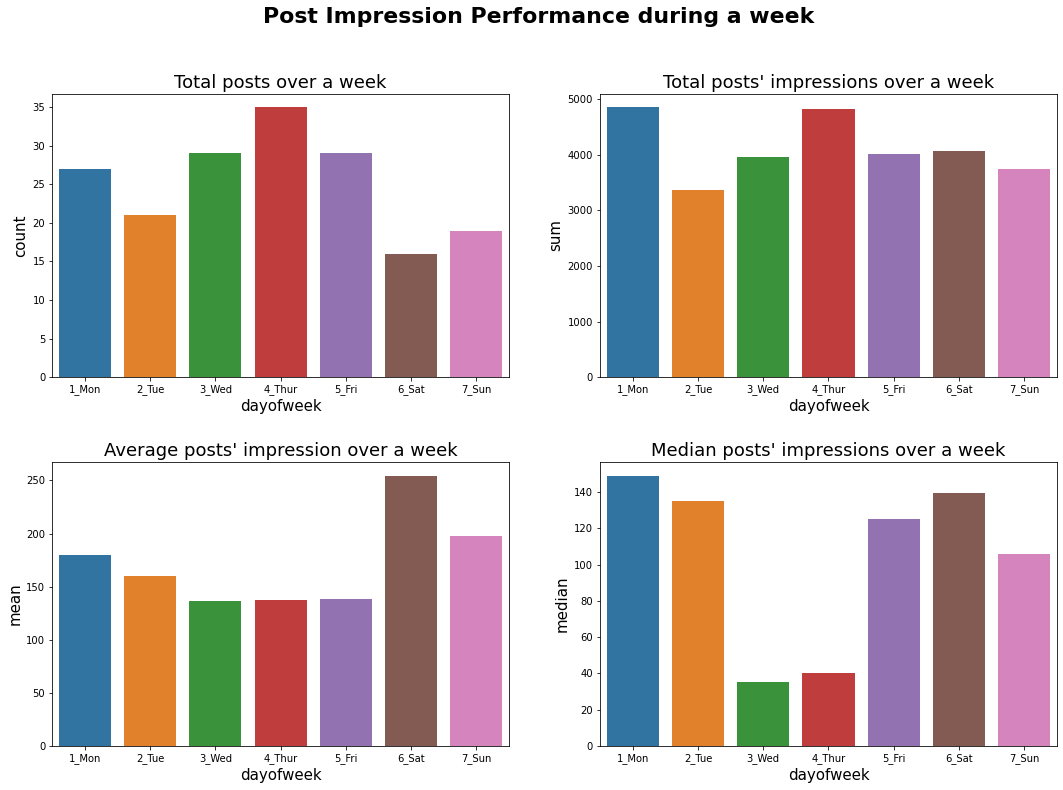

total_impression                         
                     count   sum        mean median
dayofweek                                          
1_Mon                   27  4860  180.000000  149.0
2_Tue                   21  3368  160.380952  135.0
3_Wed                   29  3964  136.689655   35.0
4_Thur                  35  4822  137.771429   40.0
5_Fri                   29  4010  138.275862  125.0
6_Sat                   16  4070  254.375000  139.5
7_Sun                   19  3750  197.368421  106.0

In [54]:
dimension = 'dayofweek'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a week', "Total posts' impressions over a week",
                "Average posts' impression over a week", "Median posts' impressions over a week"]
whole_chart_title = 'Post Impression Performance during a week'
image_description = 'Fb ' + 'Post Impression Performance during a week'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### Impression Performance over a year

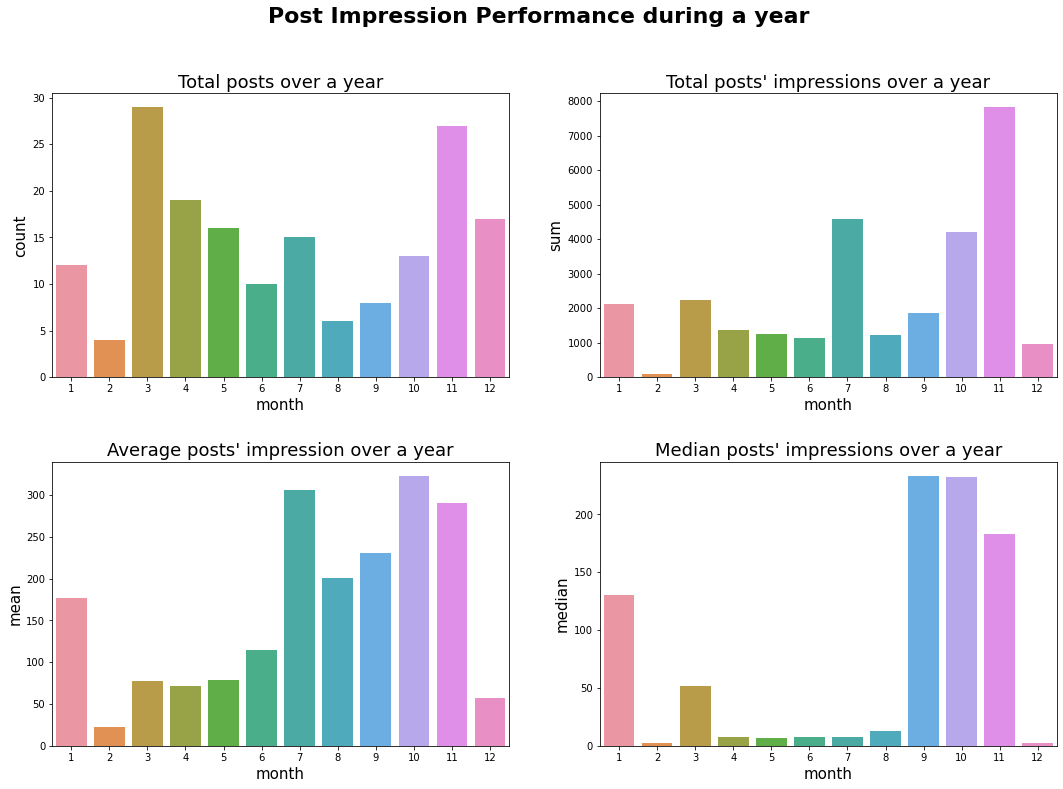

total_impression                         
                 count   sum        mean median
month                                          
1                   12  2115  176.250000  130.0
2                    4    91   22.750000    2.0
3                   29  2240   77.241379   52.0
4                   19  1359   71.526316    8.0
5                   16  1259   78.687500    6.5
6                   10  1143  114.300000    7.5
7                   15  4584  305.600000    8.0
8                    6  1207  201.166667   12.5
9                    8  1846  230.750000  233.5
10                  13  4200  323.076923  232.0
11                  27  7836  290.222222  183.0
12                  17   964   56.705882    2.0

In [55]:
dimension = 'month'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a year', "Total posts' impressions over a year",
                "Average posts' impression over a year", "Median posts' impressions over a year"]
whole_chart_title = 'Post Impression Performance during a year'
image_description = 'Fb ' + 'Post Impression Performance during a year'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

## 1.2.3 Engagement Performance

### Engagement Performance over a 24h day

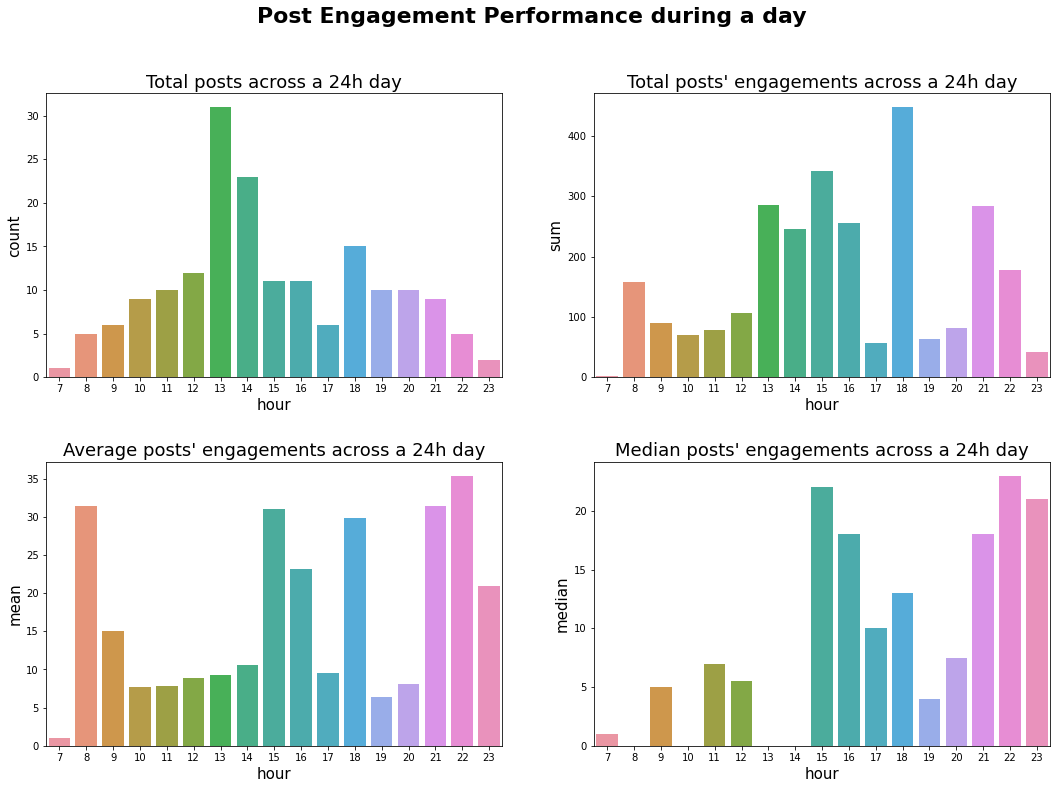

engagement                       
          count  sum       mean median
hour                                  
7             1    1   1.000000    1.0
8             5  157  31.400000    0.0
9             6   90  15.000000    5.0
10            9   69   7.666667    0.0
11           10   78   7.800000    7.0
12           12  107   8.916667    5.5
13           31  286   9.225806    0.0
14           23  245  10.652174    0.0
15           11  342  31.090909   22.0
16           11  255  23.181818   18.0
17            6   57   9.500000   10.0
18           15  448  29.866667   13.0
19           10   64   6.400000    4.0
20           10   81   8.100000    7.5
21            9  283  31.444444   18.0
22            5  177  35.400000   23.0
23            2   42  21.000000   21.0

In [56]:
dimension = 'hour'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts across a 24h day', "Total posts' engagements across a 24h day",
                "Average posts' engagements across a 24h day", "Median posts' engagements across a 24h day"]
whole_chart_title = 'Post Engagement Performance during a day'
image_description = 'Fb ' + 'Post Engagement Performance during a day'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### Engagement Performance over a 7-day week

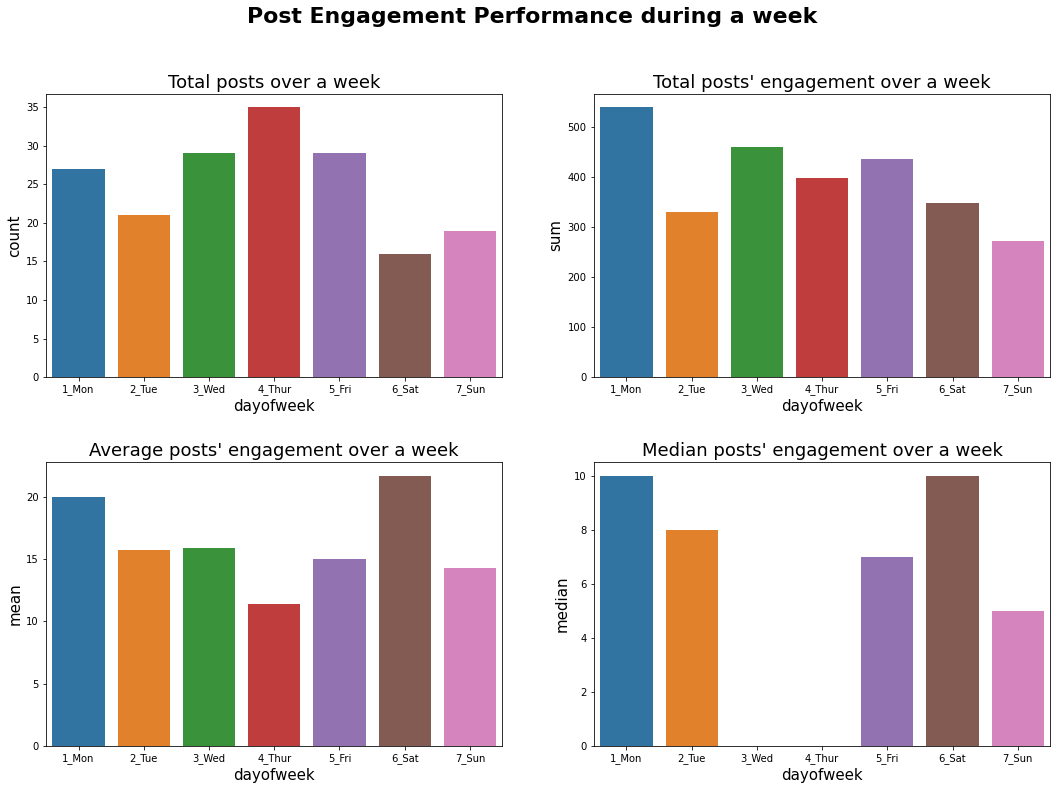

engagement                       
               count  sum       mean median
dayofweek                                  
1_Mon             27  539  19.962963     10
2_Tue             21  330  15.714286      8
3_Wed             29  460  15.862069      0
4_Thur            35  398  11.371429      0
5_Fri             29  436  15.034483      7
6_Sat             16  347  21.687500     10
7_Sun             19  272  14.315789      5

In [57]:
dimension = 'dayofweek'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a week', "Total posts' engagement over a week",
                "Average posts' engagement over a week", "Median posts' engagement over a week"]
whole_chart_title = 'Post Engagement Performance during a week'
image_description = 'Fb ' + 'Post Engagement Performance during a week'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### Engagement Performance over a year

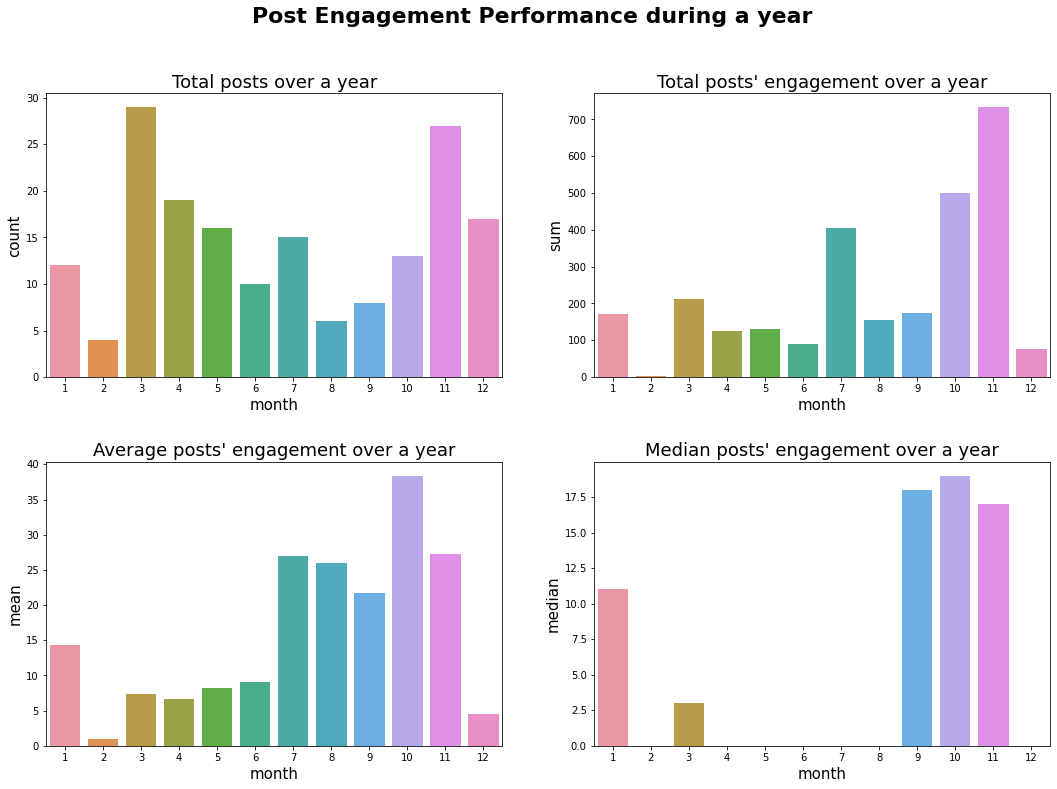

engagement                       
           count  sum       mean median
month                                  
1             12  172  14.333333     11
2              4    4   1.000000      0
3             29  213   7.344828      3
4             19  126   6.631579      0
5             16  132   8.250000      0
6             10   91   9.100000      0
7             15  404  26.933333      0
8              6  156  26.000000      0
9              8  174  21.750000     18
10            13  499  38.384615     19
11            27  734  27.185185     17
12            17   77   4.529412      0

In [58]:
dimension = 'month'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a year', "Total posts' engagement over a year",
                "Average posts' engagement over a year", "Median posts' engagement over a year"]
whole_chart_title = 'Post Engagement Performance during a year'
image_description = 'Fb ' + 'Post Engagement Performance during a year'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

## 1.2.4 Correlation between Reach, Impression, Engagement, Life time of each post

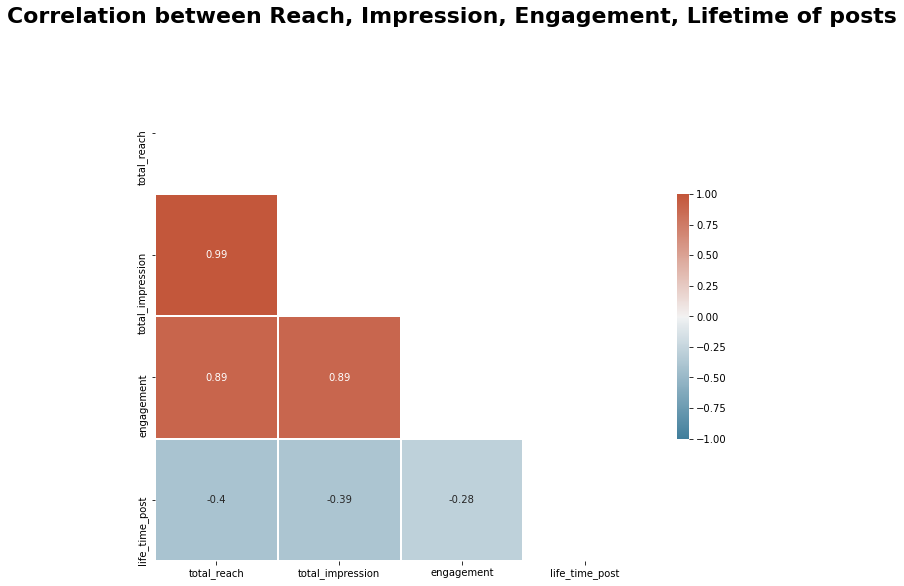

In [59]:
df['life_time_post'] = (pd.to_datetime('today').date() - df['date']).astype('timedelta64[D]')

columns = ['total_reach', 'total_impression', 'engagement','life_time_post']

chart_title = 'Correlation between Reach, Impression, Engagement, Lifetime of posts'
image_description = 'Fb ' + chart_title

# Compute the correlation matrix
corr = df[columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
fig.suptitle(chart_title, fontsize=22, weight='bold')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1,
                        linewidths=1, cbar_kws={"shrink": 0.5}, annot=True)

fig.savefig('./{}/{}.jpeg'.format(save_path, image_description), bbox_inches='tight', dpi=50)
plt.show()

## 1.2.5 Determine which factors have a positive influence on post impressions

### Sentiment of each post's description

In [60]:
analyzer = SentimentIntensityAnalyzer()
def post_sentiment(message):
    sentiment = analyzer.polarity_scores(message)
    sentiment = pd.Series({'neg': sentiment['neg'], 'neu': sentiment['neu'], 'pos': sentiment['pos'], 'compound': sentiment['compound']})
    return sentiment

df[['neg', 'neu', 'pos', 'compound']] = df['message'].apply(post_sentiment)

### #Hashtags, @Peopletags

#### Extract #hashtags and @peopletags

In [61]:
df['message'] = df['message'].fillna('')

# hashtag
df['hashtags'] = df['message'].apply(lambda x: re.findall(r"#\w+", x))

# peopletag
df['peopletags'] = df['message'].apply(lambda x: re.findall(r"@\w+", x))

#### Remove #hashtags and @peopletags from posts' description

In [62]:
# test['caption'][0] = 'Duong Hoan Vu !1 1! `~ @maxduong11at #maxduong22hashtag'
# test['caption'].apply(remove_hashtag_mesg)

def remove_hashtag_peopletag_mesg(message):
    return ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split())

def tag_list(df_tags):
    tags_all = set()
        
    for hashtag in df_tags:
        try:
            tags_all.update(hashtag)
        except AttributeError:
            pass
    
    return tags_all

def split_tags(val):
    try:
        if tag in val:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

# remove hashtags & peopletags from a message
df['message'] = df['message'].apply(remove_hashtag_peopletag_mesg)

hashtags = tag_list(df['hashtags'])
peopletags = tag_list(df['peopletags'])

for tag in hashtags:        
    df[tag] = df['hashtags'].apply(split_tags)
    
for tag in peopletags:        
    df[tag] = df['peopletags'].apply(split_tags)

#### Prepare data and Modeling

In [63]:
cols_drop = [ 'id', 'date', 'total_reach', 'hashtags', 'peopletags', 'status_type', 'message', 'url']
df = df.drop(cols_drop, axis=1)

df = pd.get_dummies(df)

x_train = df.drop('total_impression', axis=1)
y_train = df['total_impression']

dt = DecisionTreeRegressor(max_depth=15).fit(x_train, y_train)
rf = RandomForestRegressor(random_state=0,n_jobs=-1,verbose=0).fit(x_train, y_train)
gb = GradientBoostingRegressor(random_state = 0).fit(x_train, y_train)
xgb = XGBRegressor(random_state = 0, n_job=-1).fit(x_train, y_train)

[20:23:46] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_job" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### Importance Features

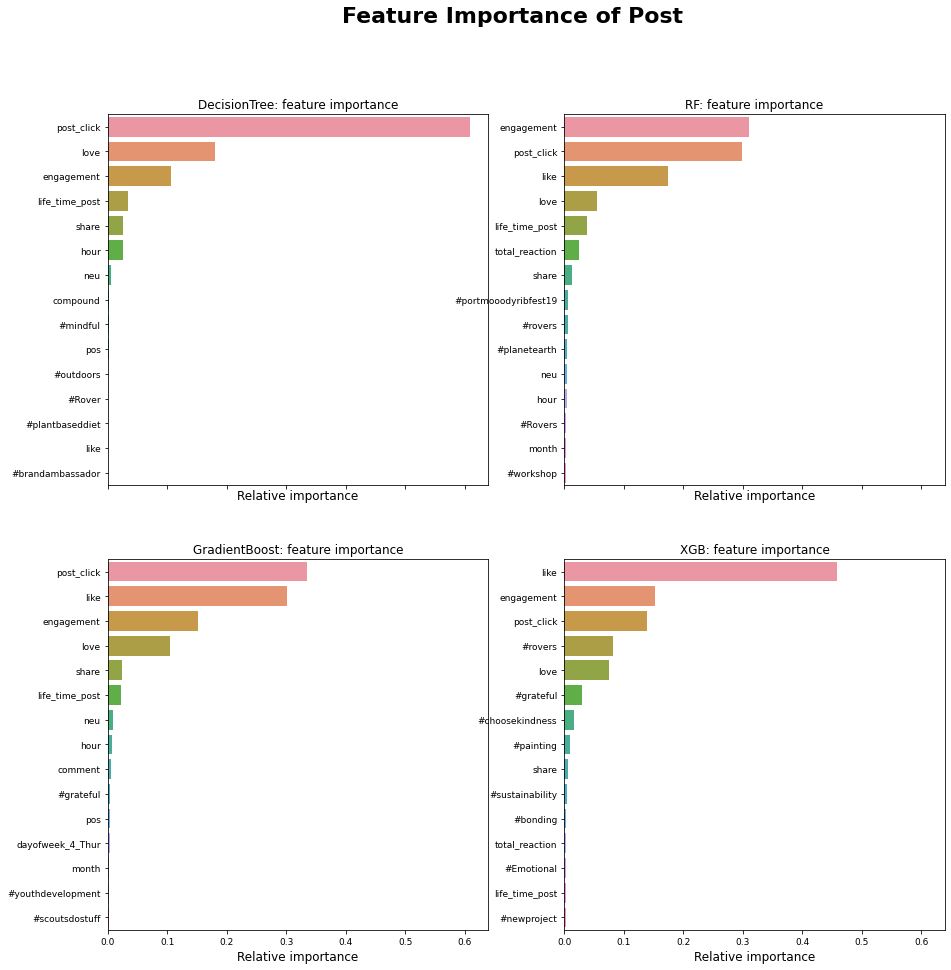

In [64]:
chart_title = 'Feature Importance of Post'
image_description = 'Fb ' + chart_title

feature_importances_num = 15

nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
fig.suptitle(chart_title, fontsize=22, weight='bold')

names_classifiers = [("DecisionTree", dt), ("RF", rf), ("GradientBoost", gb), ("XGB", xgb)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:feature_importances_num]
        g = sns.barplot(y=x_train.columns[indices][:feature_importances_num],x = classifier.feature_importances_[indices][:feature_importances_num] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        #g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + ": feature importance")
        nclassifier += 1

fig.savefig('./{}/{}.jpeg'.format(save_path, image_description), bbox_inches='tight', dpi=50)

### Save File

In [65]:
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)


ws_dashboard = writer.sheets['FB Post Analysis']

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Impression Performance during a day.jpeg'.format(save_path))
img.anchor = 'A2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Impression Performance during a week.jpeg'.format(save_path))
img.anchor = 'N2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Impression Performance during a week.jpeg'.format(save_path))
img.anchor = 'AA2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Engagement Performance during a day.jpeg'.format(save_path))
img.anchor = 'A32'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Engagement Performance during a week.jpeg'.format(save_path))
img.anchor = 'N32'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Fb Post Engagement Performance during a week.jpeg'.format(save_path))
img.anchor = 'AA32'
ws_dashboard.add_image(img)


### FB gender
img = openpyxl.drawing.image.Image('./{}/Fb Correlation between Reach, Impression, Engagement, Lifetime of posts.jpeg'.format(save_path))
img.anchor = 'A62'
ws_dashboard.add_image(img)

### FB age
img = openpyxl.drawing.image.Image('./{}/Fb Feature Importance of Post.jpeg'.format(save_path))
img.anchor = 'N62'
ws_dashboard.add_image(img)


writer.save()
writer.close()

# 2. IG

## 2.1 Account/Page Dashboard

In [66]:
save_path = 'ig image'

### Profile Views, People Reached

In [68]:
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)


##### IG ACCOUNT PERFORMANCE
sheet_name = 'ig account performance'
data_frame = pd.read_excel(open(report_name, 'rb'), sheet_name=sheet_name)
max_rows = data_frame.shape[0] + 1

ws = writer.sheets[sheet_name]
ws_dashboard = writer.sheets['IG Dashboard']

### IG PROFILE VIEWS
chart = LineChart()
chart.title = "Profile Views"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 2 # profile_views
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)
#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "A2")


### IG PEOPLE REACHED
chart = LineChart()
chart.title = "People Reached"
chart.style = 12
#chart.y_axis.title = ""
chart.y_axis.crossAx = 500
chart.x_axis = DateAxis(crossAx=100)
chart.x_axis.number_format = 'd-mmm'
chart.x_axis.majorTimeUnit = "days"
#chart.x_axis.title = ""
chart.legend = None

min_col_row = 3 # reach
data = Reference(ws, min_col=min_col_row, min_row=1, max_col=min_col_row, max_row=max_rows)
chart.add_data(data, titles_from_data=True)
dates = Reference(ws, min_col=1, min_row=2, max_row=max_rows)
chart.set_categories(dates)
#ws.add_chart(chart, "A2")
ws_dashboard.add_chart(chart, "K2")

writer.save()
writer.close()

### Online Followers

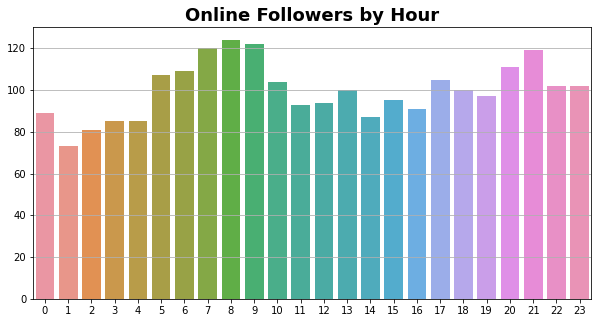

In [69]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='ig online follower')

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x='hour', y='follower_online', data=df)
sns_plot.set_title('Online Followers by Hour', weight='bold').set_fontsize('18')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/ig online follower.jpeg".format(save_path), bbox_inches='tight')

### Gender, Age, Gender and Age

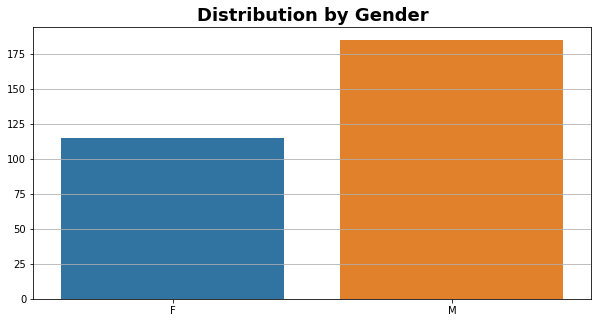

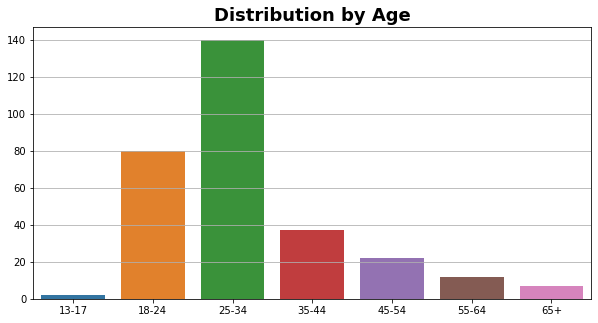

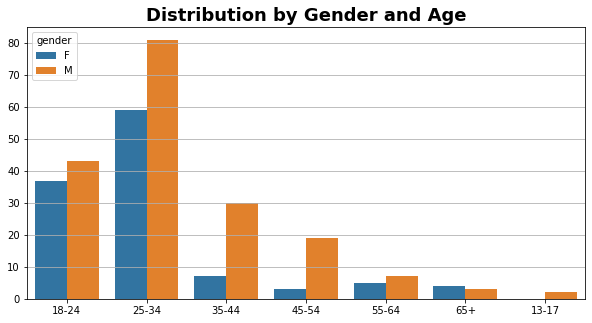

In [70]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='ig gender age')

### GENDER
ig_gender = df.groupby(['gender'])['value'].sum()

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(ig_gender.index, ig_gender.values)
sns_plot.set_title('Distribution by Gender', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/ig gender.jpeg".format(save_path), bbox_inches='tight')


### AGE
ig_age = df.groupby(['group age'])['value'].sum()

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(ig_age.index, ig_age.values)
sns_plot.set_title('Distribution by Age', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/ig age.jpeg".format(save_path), bbox_inches='tight')


### GENDER & AGE
plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x="group age", y="value", hue="gender", data=df)
sns_plot.set_title('Distribution by Gender and Age', weight='bold').set_fontsize('18') 
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='y') 
sns_plot.figure.savefig("./{}/ig gender age.jpeg".format(save_path), bbox_inches='tight')

### City

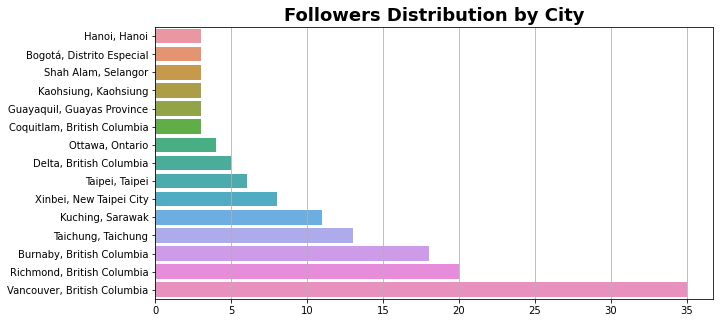

In [71]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='ig city')
city = df.sort_values(by=['value'])[-15:]

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x='value', y='city', data=city, orient = 'h')
sns_plot.set_title('Followers Distribution by City', weight='bold').set_fontsize('18')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='x') 
sns_plot.figure.savefig("./{}/ig city.jpeg".format(save_path), bbox_inches='tight')

### Country

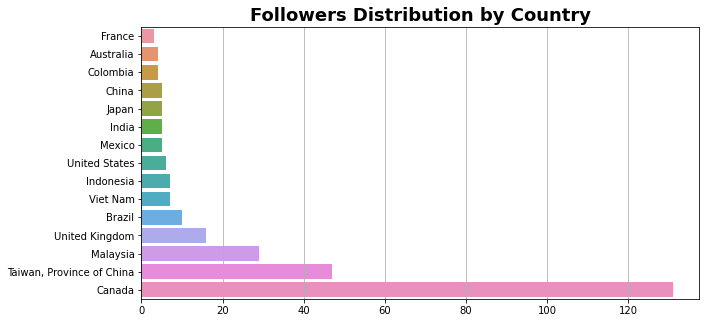

In [72]:
df = pd.read_excel(open(report_name, 'rb'), sheet_name='ig country')
country = df.sort_values(by=['value'])[-15:]

plt.figure(figsize=(10,5))
sns_plot = sns.barplot(x='value', y='country', data=country, orient = 'h')
sns_plot.set_title('Followers Distribution by Country', weight='bold').set_fontsize('18')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.grid(axis='x') 
sns_plot.figure.savefig("./{}/ig country.jpeg".format(save_path), bbox_inches='tight')

### Save File

In [74]:
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = writer.sheets[sheet_name]
ws_dashboard = writer.sheets['IG Dashboard']

### IG ONLINE FOLLOWERS
img = openpyxl.drawing.image.Image('./{}/ig online follower.jpeg'.format(save_path))
img.anchor = 'U2'
ws_dashboard.add_image(img)

### IG GENDER
img = openpyxl.drawing.image.Image('./{}/ig gender.jpeg'.format(save_path))
img.anchor = 'A19'
ws_dashboard.add_image(img)

### IG AGE
img = openpyxl.drawing.image.Image('./{}/ig age.jpeg'.format(save_path))
img.anchor = 'K19'
ws_dashboard.add_image(img)

### IG GENDER AGE
img = openpyxl.drawing.image.Image('./{}/ig gender age.jpeg'.format(save_path))
img.anchor = 'U19'
ws_dashboard.add_image(img)


### IG CITY
img = openpyxl.drawing.image.Image('./{}/ig city.jpeg'.format(save_path))
img.anchor = 'A38'
ws_dashboard.add_image(img)

### IG COUNTRY
img = openpyxl.drawing.image.Image('./{}/ig country.jpeg'.format(save_path))
img.anchor = 'K38'
ws_dashboard.add_image(img)

writer.save()
writer.close()

## 2.2 Post

### 2.2.1 Image and Carousel Posts

In [75]:
# Load Data
df = pd.read_excel(open(report_name, 'rb'), sheet_name='ig posts')

# Image & Carousel Posts
df = df[df['media_type'] != 'VIDEO']

# Remove Outliers
df = df[df['total_impression'] > 130].copy()

    ### FEATURE EXTRACTION
# Change datatype of date
df['date'] = pd.to_datetime(df['date'])
# Create new features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['dayofweek'] = df['dayofweek'].map( {0: '1_Mon', 1: '2_Tue', 2: '3_Wed', 3: '4_Thur', 4: '5_Fri', 5: '6_Sat', 6: '7_Sun'})
df['date'] = df['date'].dt.date   # df['date'].dt.normalize()  # Show only date

### 2.2.2 Post Impression

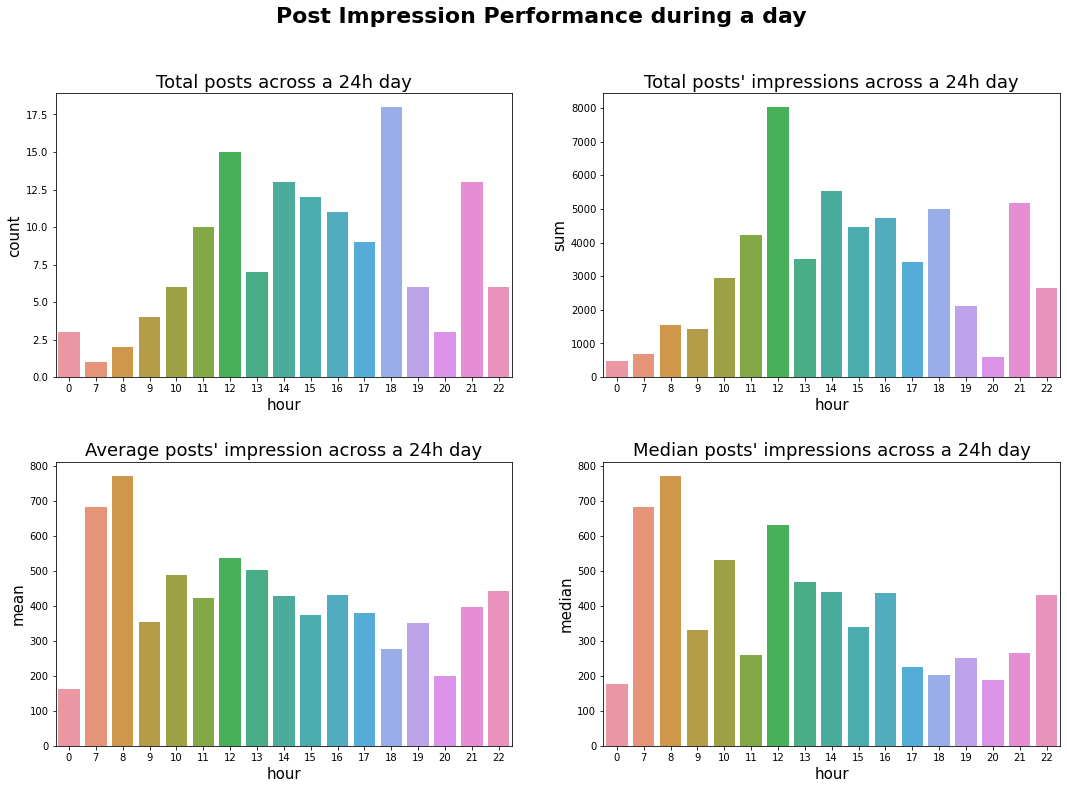

total_impression                         
                count   sum        mean median
hour                                          
0                   3   490  163.333333  176.0
7                   1   683  683.000000  683.0
8                   2  1542  771.000000  771.0
9                   4  1417  354.250000  329.5
10                  6  2933  488.833333  529.0
11                 10  4214  421.400000  260.5
12                 15  8032  535.466667  629.0
13                  7  3506  500.857143  467.0
14                 13  5548  426.769231  439.0
15                 12  4473  372.750000  339.5
16                 11  4722  429.272727  435.0
17                  9  3420  380.000000  225.0
18                 18  4994  277.444444  201.0
19                  6  2104  350.666667  252.0
20                  3   594  198.000000  188.0
21                 13  5167  397.461538  264.0
22                  6  2657  442.833333  431.0

In [76]:
dimension = 'hour'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts across a 24h day', "Total posts' impressions across a 24h day",
                "Average posts' impression across a 24h day", "Median posts' impressions across a 24h day"]
whole_chart_title = 'Post Impression Performance during a day'
image_description = 'Ig ' + 'Post Impression Performance during a day'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

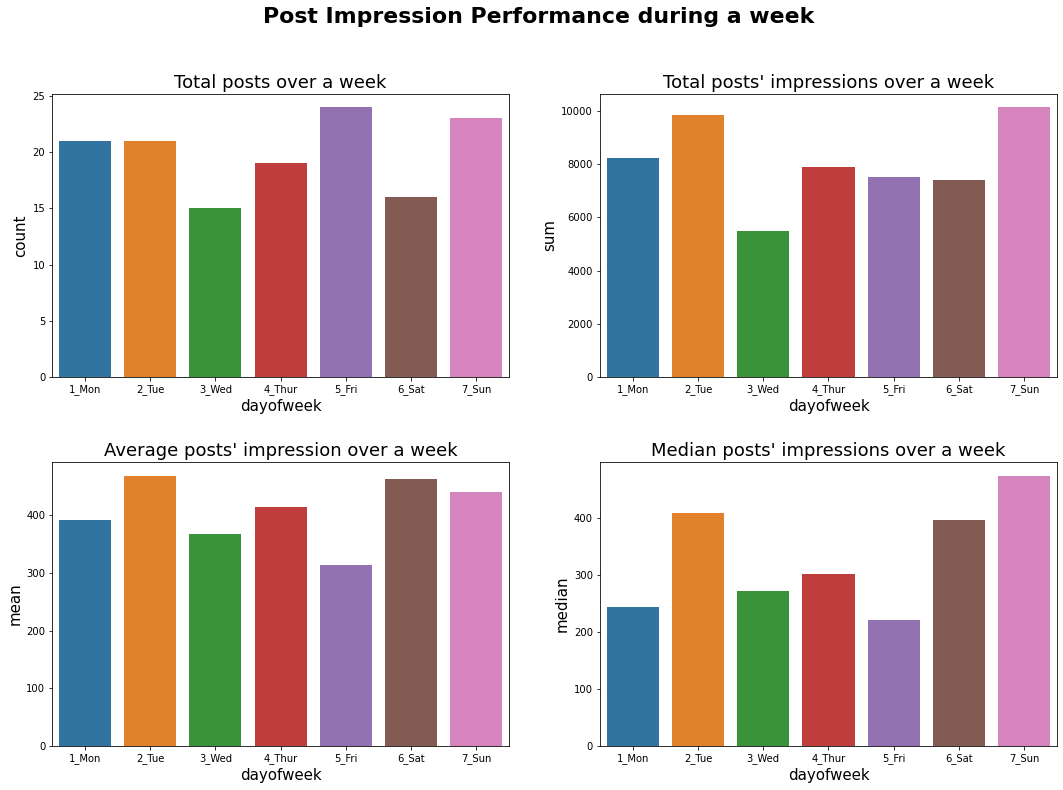

total_impression                          
                     count    sum        mean median
dayofweek                                           
1_Mon                   21   8230  391.904762  244.0
2_Tue                   21   9837  468.428571  410.0
3_Wed                   15   5501  366.733333  273.0
4_Thur                  19   7881  414.789474  303.0
5_Fri                   24   7522  313.416667  221.0
6_Sat                   16   7394  462.125000  396.5
7_Sun                   23  10131  440.478261  475.0

In [77]:
dimension = 'dayofweek'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a week', "Total posts' impressions over a week",
                "Average posts' impression over a week", "Median posts' impressions over a week"]
whole_chart_title = 'Post Impression Performance during a week'
image_description = 'Ig ' + 'Post Impression Performance during a week'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

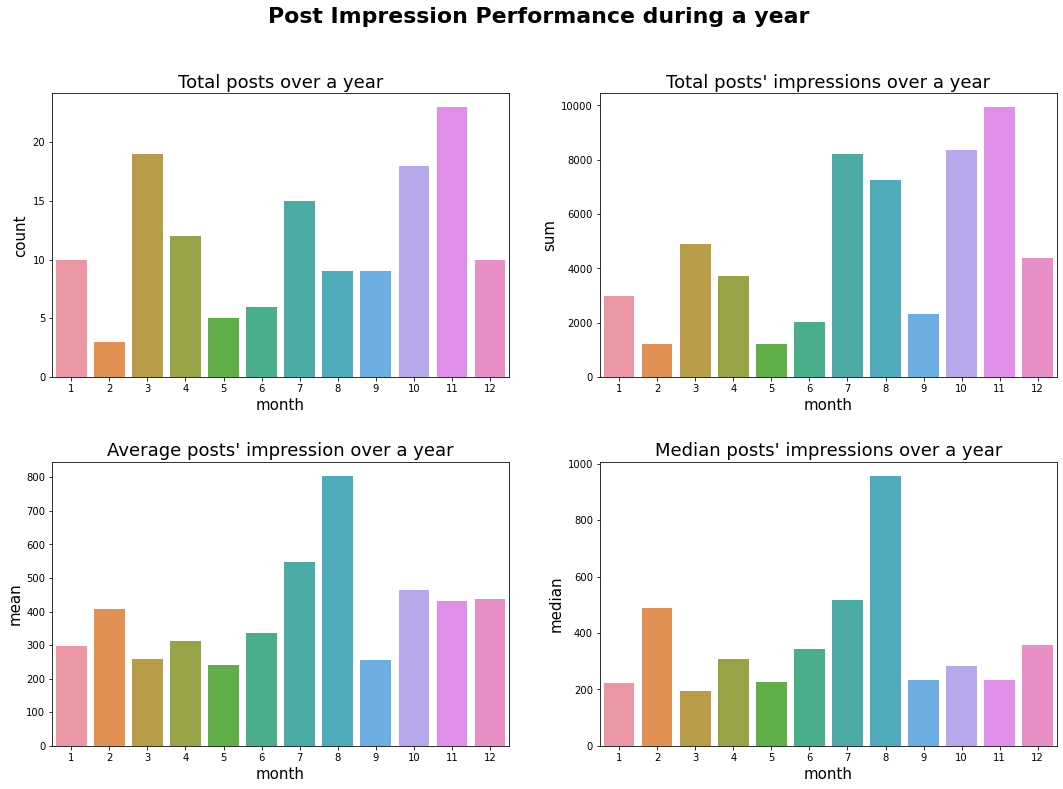

total_impression                         
                 count   sum        mean median
month                                          
1                   10  2973  297.300000  221.0
2                    3  1222  407.333333  489.0
3                   19  4889  257.315789  196.0
4                   12  3736  311.333333  308.0
5                    5  1211  242.200000  225.0
6                    6  2019  336.500000  345.0
7                   15  8213  547.533333  518.0
8                    9  7244  804.888889  958.0
9                    9  2310  256.666667  232.0
10                  18  8348  463.777778  283.5
11                  23  9943  432.304348  232.0
12                  10  4388  438.800000  358.0

In [78]:
dimension = 'month'
metric = 'total_impression'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a year', "Total posts' impressions over a year",
                "Average posts' impression over a year", "Median posts' impressions over a year"]
whole_chart_title = 'Post Impression Performance during a year'
image_description = 'Ig ' + 'Post Impression Performance during a year'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### 2.2.3 Post Engagement

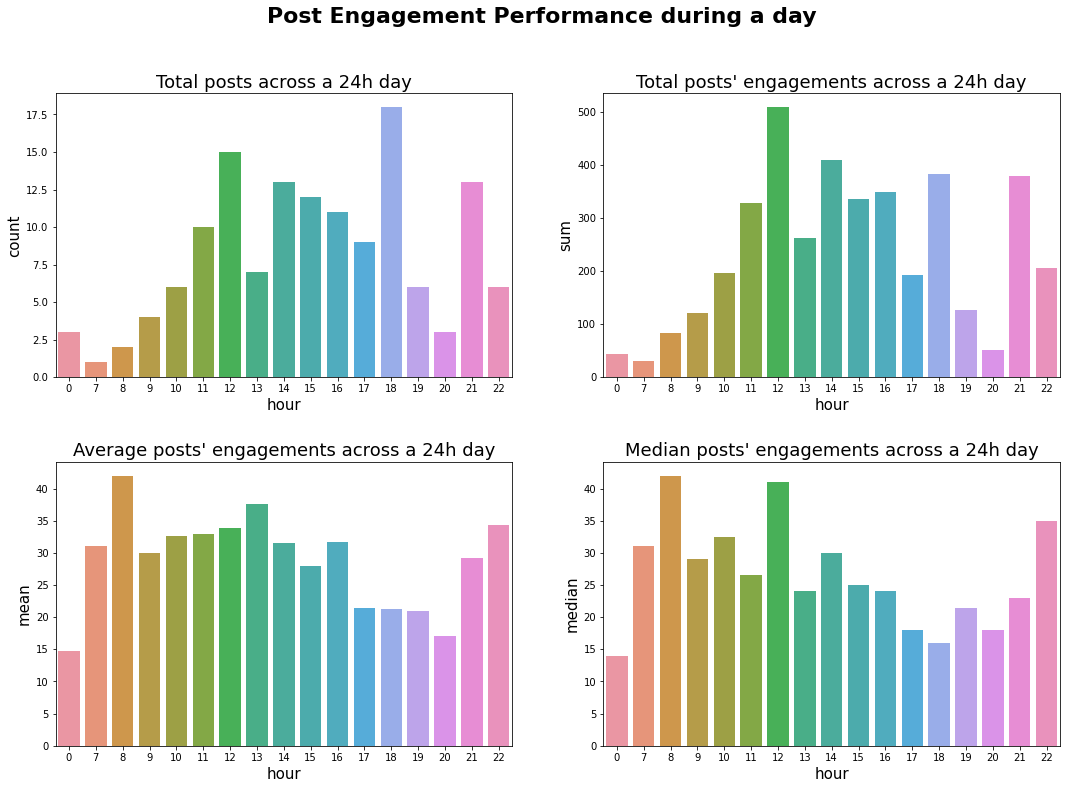

engagement                       
          count  sum       mean median
hour                                  
0             3   44  14.666667   14.0
7             1   31  31.000000   31.0
8             2   84  42.000000   42.0
9             4  120  30.000000   29.0
10            6  196  32.666667   32.5
11           10  329  32.900000   26.5
12           15  509  33.933333   41.0
13            7  263  37.571429   24.0
14           13  409  31.461538   30.0
15           12  335  27.916667   25.0
16           11  348  31.636364   24.0
17            9  193  21.444444   18.0
18           18  383  21.277778   16.0
19            6  126  21.000000   21.5
20            3   51  17.000000   18.0
21           13  379  29.153846   23.0
22            6  206  34.333333   35.0

In [79]:
dimension = 'hour'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts across a 24h day', "Total posts' engagements across a 24h day",
                "Average posts' engagements across a 24h day", "Median posts' engagements across a 24h day"]
whole_chart_title = 'Post Engagement Performance during a day'
image_description = 'Ig ' + 'Post Engagement Performance during a day'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

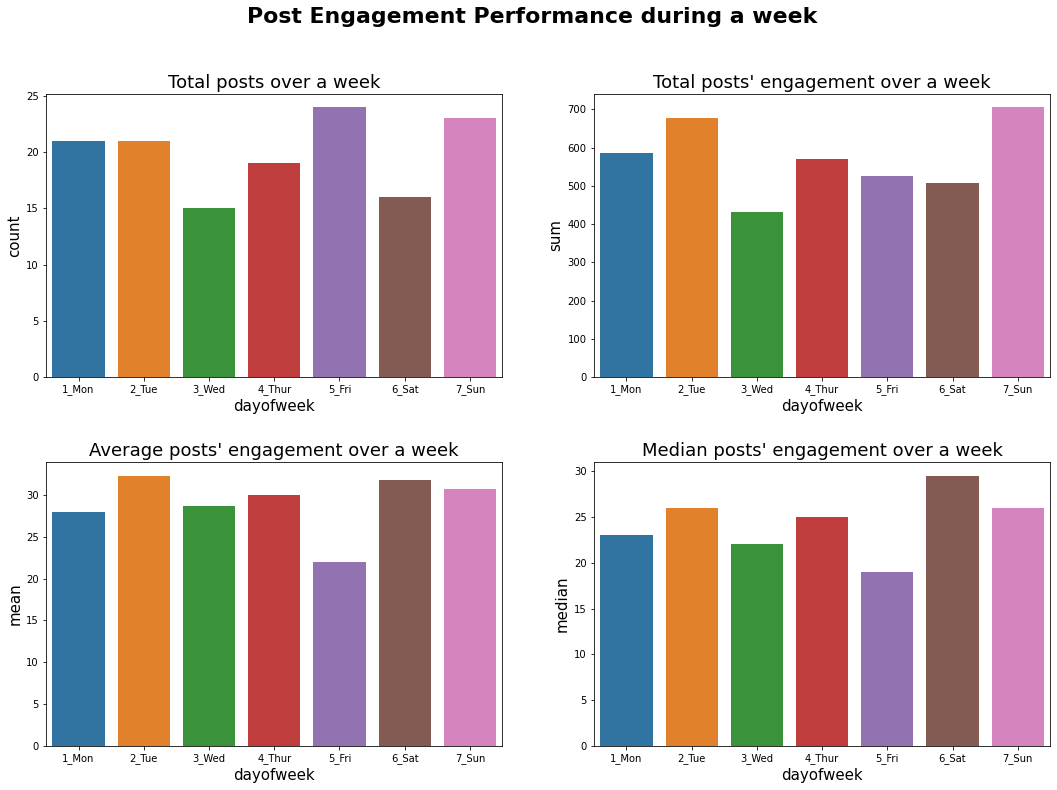

engagement                       
               count  sum       mean median
dayofweek                                  
1_Mon             21  587  27.952381   23.0
2_Tue             21  678  32.285714   26.0
3_Wed             15  431  28.733333   22.0
4_Thur            19  569  29.947368   25.0
5_Fri             24  527  21.958333   19.0
6_Sat             16  508  31.750000   29.5
7_Sun             23  706  30.695652   26.0

In [80]:
dimension = 'dayofweek'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a week', "Total posts' engagement over a week",
                "Average posts' engagement over a week", "Median posts' engagement over a week"]
whole_chart_title = 'Post Engagement Performance during a week'
image_description = 'Ig ' + 'Post Engagement Performance during a week'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

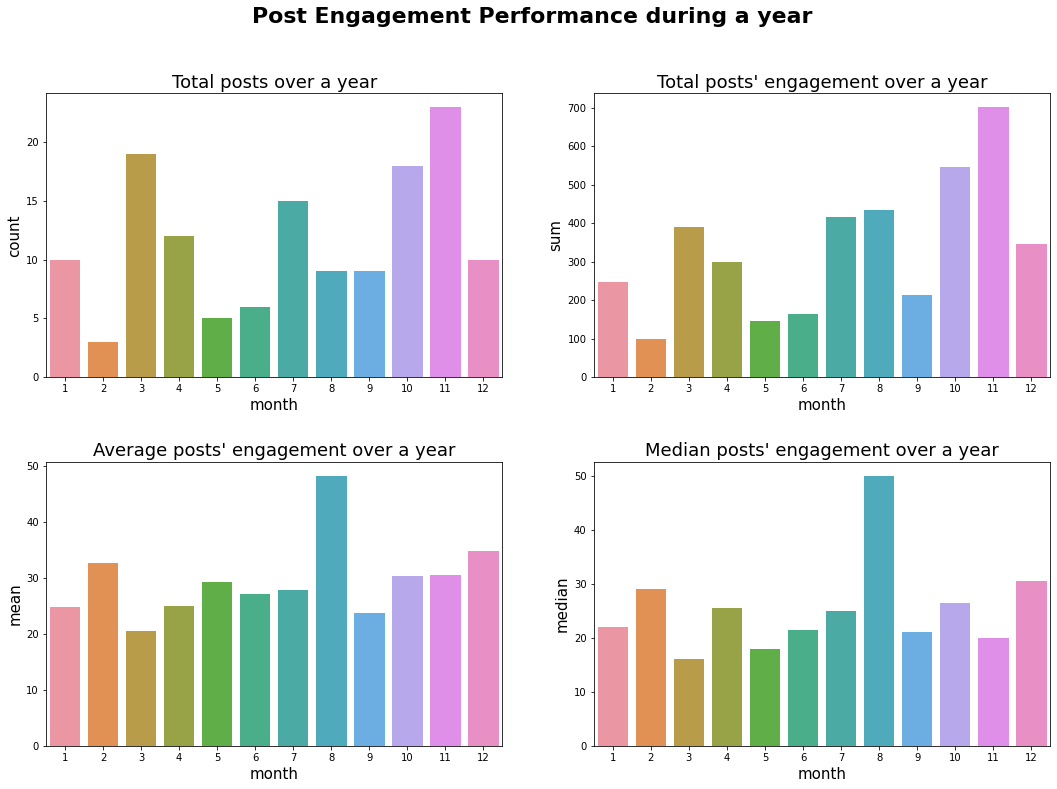

engagement                       
           count  sum       mean median
month                                  
1             10  248  24.800000   22.0
2              3   98  32.666667   29.0
3             19  391  20.578947   16.0
4             12  299  24.916667   25.5
5              5  146  29.200000   18.0
6              6  163  27.166667   21.5
7             15  417  27.800000   25.0
8              9  434  48.222222   50.0
9              9  214  23.777778   21.0
10            18  547  30.388889   26.5
11            23  702  30.521739   20.0
12            10  347  34.700000   30.5

In [81]:
dimension = 'month'
metric = 'engagement'
metric_aggregation = ['count','sum','mean','median']
chart_titles = ['Total posts over a year', "Total posts' engagement over a year",
                "Average posts' engagement over a year", "Median posts' engagement over a year"]
whole_chart_title = 'Post Engagement Performance during a year'
image_description = 'Ig ' + 'Post Engagement Performance during a year'
plot_4_graphs(df, dimension, metric, metric_aggregation, chart_titles, whole_chart_title, image_description, save_path)

### 2.2.4 Correlation between Reach, Impression, Engagement, Life time of each post

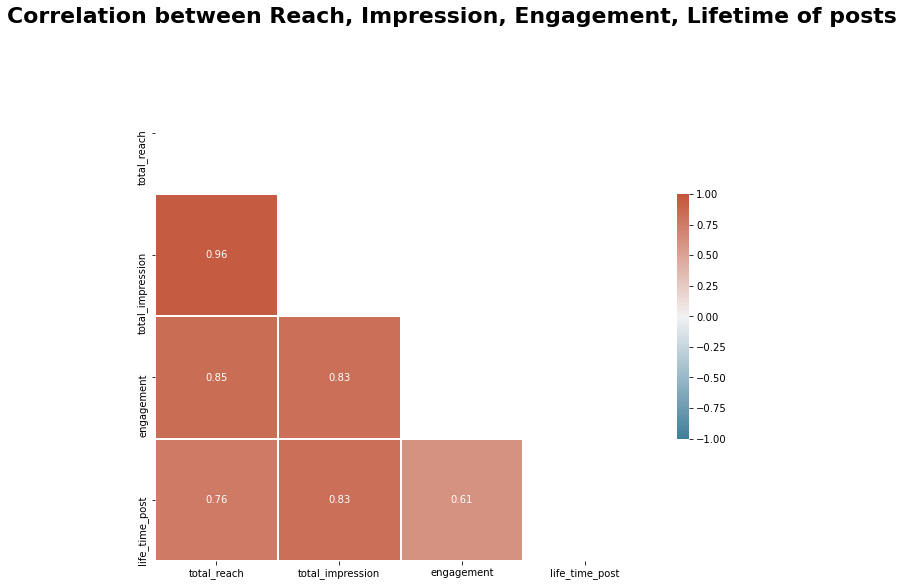

In [82]:
df['life_time_post'] = (pd.to_datetime('today').date() - df['date']).astype('timedelta64[D]')

columns = ['total_reach', 'total_impression', 'engagement','life_time_post']

chart_title = 'Correlation between Reach, Impression, Engagement, Lifetime of posts'
image_description = 'Ig ' + chart_title

# Compute the correlation matrix
corr = df[columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
fig.suptitle(chart_title, fontsize=22, weight='bold')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1,
                        linewidths=1, cbar_kws={"shrink": 0.5}, annot=True)

fig.savefig('./{}/{}.jpeg'.format(save_path, image_description), bbox_inches='tight', dpi=50)
plt.show()

### 2.2.5 Determine which factors have a positive influence on post impressions

#### Sentiment of each post's description

In [83]:
analyzer = SentimentIntensityAnalyzer()
def post_sentiment(message):
    sentiment = analyzer.polarity_scores(message)
    sentiment = pd.Series({'neg': sentiment['neg'], 'neu': sentiment['neu'], 'pos': sentiment['pos'], 'compound': sentiment['compound']})
    return sentiment

df[['neg', 'neu', 'pos', 'compound']] = df['caption'].apply(post_sentiment)

#### #Hashtags, @Peopletags

In [84]:
df['caption'] = df['caption'].fillna('')

# hashtag
df['hashtags'] = df['caption'].apply(lambda x: re.findall(r"#\w+", x))

# peopletag
df['peopletags'] = df['caption'].apply(lambda x: re.findall(r"@\w+", x))

# test['caption'][0] = 'Duong Hoan Vu !1 1! `~ @maxduong11at #maxduong22hashtag'
# test['caption'].apply(remove_hashtag_mesg)

def remove_hashtag_peopletag_mesg(message):
    return ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",message).split())

def tag_list(df_tags):
    tags_all = set()
        
    for hashtag in df_tags:
        try:
            tags_all.update(hashtag)
        except AttributeError:
            pass
    
    return tags_all

def split_tags(val):
    try:
        if tag in val:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

# remove hashtags & peopletags from a message
df['caption'] = df['caption'].apply(remove_hashtag_peopletag_mesg)

hashtags = tag_list(df['hashtags'])
peopletags = tag_list(df['peopletags'])

for tag in hashtags:        
    df[tag] = df['hashtags'].apply(split_tags)
    
for tag in peopletags:        
    df[tag] = df['peopletags'].apply(split_tags)

#### Prepare data and Modeling

In [85]:
cols_drop = [ 'id', 'date', 'total_reach', 'hashtags', 'peopletags', 'media_type', 'caption', 'url']
df = df.drop(cols_drop, axis=1)

df = pd.get_dummies(df)

x_train = df.drop('total_impression', axis=1)
y_train = df['total_impression']

dt = DecisionTreeRegressor(max_depth=15).fit(x_train, y_train)
rf = RandomForestRegressor(random_state=0,n_jobs=-1,verbose=0).fit(x_train, y_train)
gb = GradientBoostingRegressor(random_state = 0).fit(x_train, y_train)
xgb = XGBRegressor(random_state = 0, n_job=-1).fit(x_train, y_train)

[20:29:25] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_job" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### Importance Features

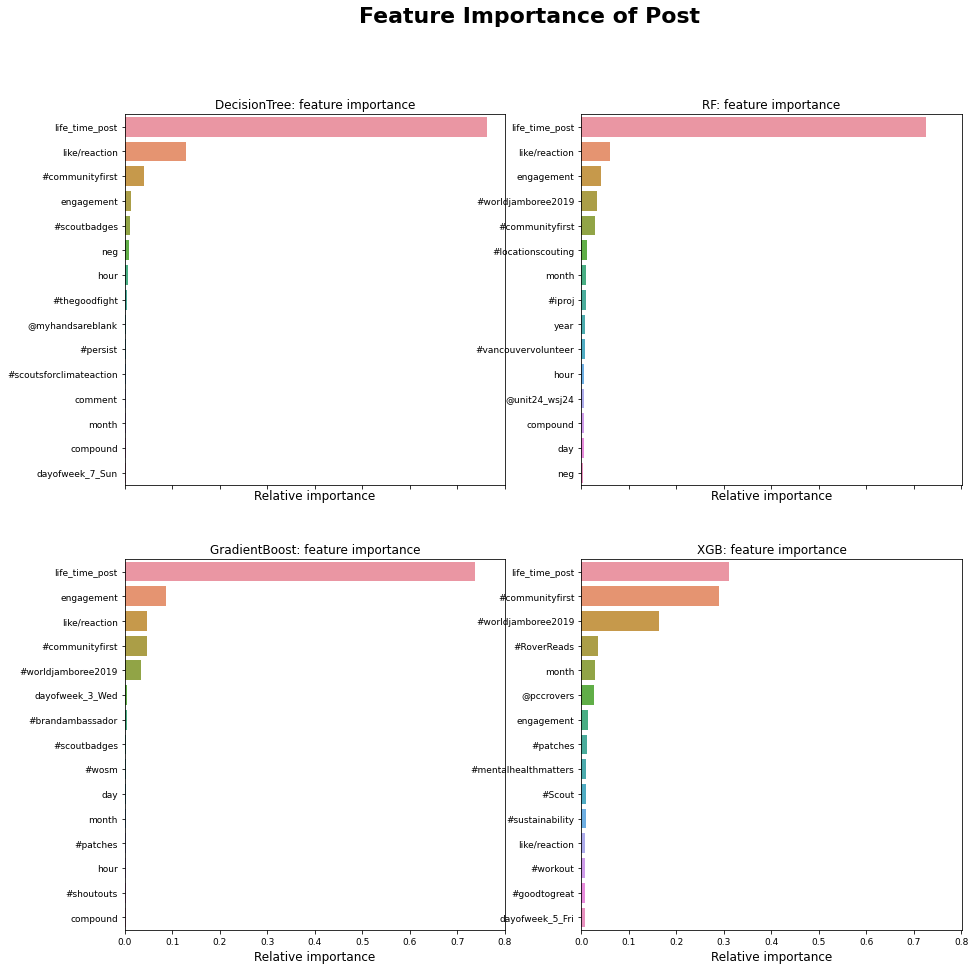

In [86]:
chart_title = 'Feature Importance of Post'
image_description = 'Ig ' + chart_title

feature_importances_num = 15

nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))
fig.suptitle(chart_title, fontsize=22, weight='bold')

names_classifiers = [("DecisionTree", dt), ("RF", rf), ("GradientBoost", gb), ("XGB", xgb)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:feature_importances_num]
        g = sns.barplot(y=x_train.columns[indices][:feature_importances_num],x = classifier.feature_importances_[indices][:feature_importances_num] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        #g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + ": feature importance")
        nclassifier += 1

fig.savefig('./{}/{}.jpeg'.format(save_path, image_description), bbox_inches='tight', dpi=50)

### Save File

In [87]:
save_path = 'ig image'
# Open Excel file
book = load_workbook(report_name)
writer = pd.ExcelWriter(report_name, engine='openpyxl') 
writer.book = book

# Store all existing sheets
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)


ws_dashboard = writer.sheets['IG Post Analysis']

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Impression Performance during a day.jpeg'.format(save_path))
img.anchor = 'A2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Impression Performance during a week.jpeg'.format(save_path))
img.anchor = 'N2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Impression Performance during a week.jpeg'.format(save_path))
img.anchor = 'AA2'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Engagement Performance during a day.jpeg'.format(save_path))
img.anchor = 'A32'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Engagement Performance during a week.jpeg'.format(save_path))
img.anchor = 'N32'
ws_dashboard.add_image(img)

### FB 
img = openpyxl.drawing.image.Image('./{}/Ig Post Engagement Performance during a week.jpeg'.format(save_path))
img.anchor = 'AA32'
ws_dashboard.add_image(img)


### FB gender
img = openpyxl.drawing.image.Image('./{}/Ig Correlation between Reach, Impression, Engagement, Lifetime of posts.jpeg'.format(save_path))
img.anchor = 'A62'
ws_dashboard.add_image(img)

### FB age
img = openpyxl.drawing.image.Image('./{}/Ig Feature Importance of Post.jpeg'.format(save_path))
img.anchor = 'N62'
ws_dashboard.add_image(img)


writer.save()
writer.close()